In [169]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

import locale
from locale import atoi

In [188]:
# Read in data 
property_inventory = pd.read_csv("./datasets/annual_property_inventory_2017.csv")
list(property_inventory)

['Jur Dept',
 'Jurisdictional Dept',
 'PMA NUM',
 'PMA Name',
 'PMA Location Address',
 ' PMA Land SqFt ',
 'PMA Classification',
 'PMA Current Use',
 'PMA Future Use If Any',
 'City Ownership',
 'Category',
 'Comment']

In [171]:
# Cleaning up

# Converting from Strings to numbers
# Removing commas 
# Converting dashes to zeroes
locale.setlocale(locale.LC_NUMERIC, '')

def toNumber(n):
    try:
        return atoi(n)
    except:
        # print("Didn't work with " + n)
        return 0
    
property_inventory[' PMA Land SqFt '] = property_inventory[' PMA Land SqFt '].map(toNumber)

In [172]:
# Calculate total land owned by Seattle City. 
total_land = sum(property_inventory[' PMA Land SqFt '])
print("Total land:   " + str(total_land) + " sq. ft")

utilized_land = sum(property_inventory.loc[property_inventory['PMA Classification'] == "Fully Utilized"][' PMA Land SqFt '])
print("Fully utilized land:" + str(utilized_land) + " sq. ft")
print("Fully utilized %age:" + str(utilized_land / total_land * 100) + "%")
print("Land that is not fully utilized: " + str(total_land - utilized_land) + " sq. ft")

distribution = property_inventory.groupby(['PMA Classification']).sum()[' PMA Land SqFt ']
distribution

Total land:   5559871984 sq. ft
Fully utilized land:5542045626 sq. ft
Fully utilized %age:99.6793746681%
Land that is not fully utilized: 17826358 sq. ft


PMA Classification
Excess               5165098
Fully Utilized    5542045626
Interim Use          1087294
Surplus             11307777
Underutilized         221850
Unknown                41644
Unused                  2695
Name:  PMA Land SqFt , dtype: int64

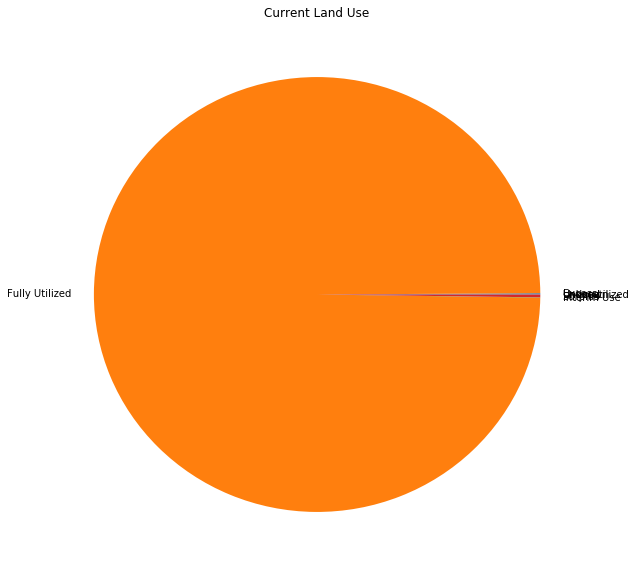

In [184]:
# Current land use distribution
series = pd.Series(distribution, name=' ')
series.plot.pie(figsize=(10, 10))
plt.title("Current Land Use")
plt.show()

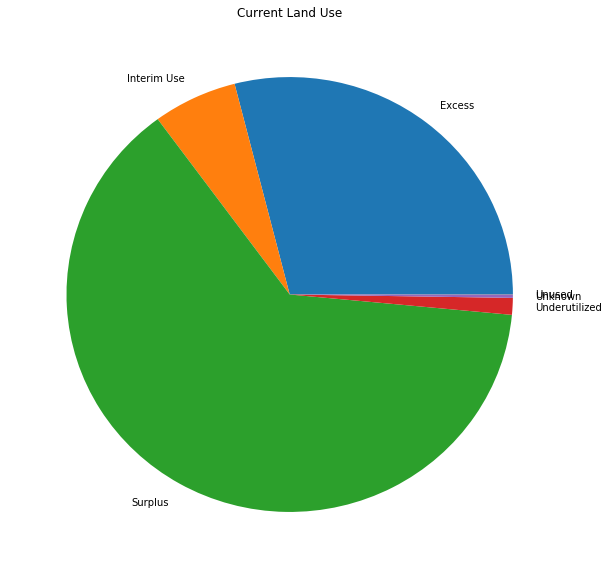

In [185]:
# Everything other than fully utilized land. 
series = pd.Series(distribution.drop(["Fully Utilized"], axis=0), name=' ')
series.plot.pie(figsize=(10, 10))
plt.title("Current Land Use")
plt.show()

In [186]:
# TODO: Figure out how many people can be housed in: 

# Land that is not fully utilized: 17826358 sq. ft

Details of PMA Classification of owned land.
https://www.seattle.gov/Documents/Departments/FAS/RealEstateServices/Property/2017-real-property-report.pdf

In [2]:
a = "Kyle is sexy"
print(a)

Kyle is sexy


In [ ]:
# Permit type category key
# 1 = Single Family 5000
# 2 = Single Family 7200
# 3 = Lowrise 1
# 4 = Lowrise 2
# 5 = Lowrise 3
# 6 = Commercial2-65
# 7 = Neighborhood Commercial2-40
# 8 = Industrial General1
# 9 = Industrial Commercial-45
# 10 = Neighborhood Commercial1-30 
# 11 = Neighborhood Commercial3-30 
